In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib import cm


# Normal functions

$ f(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $

$ F(x,\mu,\sigma) = complicated.... = \dfrac{1}{2}[1 + erf(\dfrac{x-\mu}{\sigma\sqrt{2}})] $


likelihood = pdf just with differnt interpretation

$ L(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2  } $

log likelihood = 

$ l(x,\mu,\sigma) = ln(\dfrac{1}{\sigma \sqrt{2\pi}}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 }  \\
l(x,\mu,\sigma) = -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $


i.i.d so overlal log likelihood = product of all observations over all observations...

Since we have take hte log the produce becomes a sum

log likelihood = 
$ l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}))  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \dfrac{1}{2\sigma^2} \sum(x - \mu)^2$

**score function** is the gradient of the log-likelihood function with respect to the parameter vector - evaluated at a particular point of hte parameter vector (or in the 1D case with respect to a particular parameter evaluate at a particular parameter value)

$s(\theta) \equiv \dfrac{\partial~l(\theta)}{\partial \theta} $

Score of normal With respect to $\mu$ = 

$ s(x,\mu,\sigma) = \dfrac{1}{2\sigma^2} \sum 2(x - \mu) $


**second derivative** for the normal with respect to $\mu$ is constant as the score is linear....


$ = 1/\sigma^2 $

WOW - so information jsut depends on varaince... this makes so much sense


# overall FIM of normal distribution

1 = $\mu $

2 = $\sigma$

$
(
 \begin{matrix}
  \frac{1}{\sigma^{2}} & 0  \\
  0 & \frac{1}{2\sigma^{4}}  
 \end{matrix})
$

It is orthogonal as mu and variance are independent of each other

In [ ]:
# TO DO:

# general integration over the normal function - to create the CDF

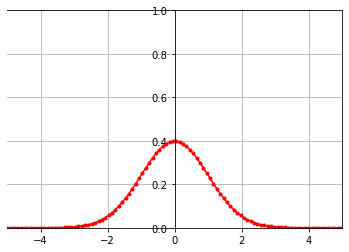

In [11]:
# plotting a normal distribution in python and integrating over parts of it

def array_gauss(X,mu,sd):
    output = []
    for x in X:
        output.append( (1 / (sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ((x - mu) / sd)**2) ) #mistakes for learning - using ^ instead of ** and using x instead of item
    return output

#Retry without looping through the array
#numpy is clever and applies functions element by element
def gauss(x,mu,sd):
    return 1/(sd*np.sqrt(2*np.pi)) * np.exp(-0.5* ((x-mu)/sd)**2)


x = np.linspace(-5,5,100)
mu = 0
sd = 1

#messign around checking numpy element by element application
y = gauss(x,mu,sd) #THIS WORKS
#y = gauss(x,np.array([mu for i in x]),np.array([sd for i in x])) # THIS WORKS
#y = gauss(x,np.array([mu for i in x]),sd) # THIS WORKS 
#y = gauss(x,np.array([mu for i in x]),[sd,sd]) # THIS DOESNT - inputs either have to be same size or 1
fig, ax = plt.subplots()

###################################################
#puts grid on the plot
ax.grid()
#sets axes (default on)
ax.set_axis_on()
#set specific axis limits
ax.set_xlim(-5,5)
ax.set_ylim(0,1)
#moving axis to middle of plot (using spines)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
####################################################

#acutal plot function
ax.plot(x,y,"r.-")


In [ ]:
#using numpy to work out the 68% rule?????
# and computationally prove the variance formula
# I am really happy with this

def gaus(x,mu,sd):
    a = []
    for item in x:
        a.append( (1 / (sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ((item - mu) / sd)**2) ) #mistakes for learning - using ^ instead of ** and using x instead of item
    return a


mu = 0.5
sd = 2
x = np.linspace(-10,10,1000)
#print(x)

y = gaus(x,mu,sd)
#print(y)

#using trapezoidal rule
print("total probability = ",np.trapz(y,x))

##################################################################################################
#plot figure
fig, ax = plt.subplots()

#puts grid on the plot
ax.grid()
#sets axes (default on)
ax.set_axis_on()
#set specific axis limits
ax.set_xlim(-sd*4,sd*4)
ax.set_ylim(0,max(y)+0.05)
#moving axis to middle of plot (using spines)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

#acutal plot function
ax.plot(x,y,color = "C1")

#saves pdf and displays plot
#fig.savefig("gaussian_distribution.pdf")
plt.show()

###bootleg varaince calculator######################################################################
#var(X) = E[X^2]-E[X]^2

y2 = []
y3 = []

# calculate E[X] (y2) and E[X^2] (y3) - uses zip which is kinda cool
for i, j in zip(x,y):
    y2.append(j * i)
    y3.append(j * (i ** 2))

eX = np.trapz(y2,x)
print("E[X]= ",eX)

eX2 = np.trapz(y3,x)
print("E[x^2]= ",eX2)

# var(X)
vX = eX2 - (eX ** 2)
print("var(X)= ",vX)

# future challenge = actually writing this out myself


In [ ]:
# 3D surface plot of the joint PDF of 2 standard normals #DUPLICATE SCRIPT

#gausian distribution calculator
def gaus(x,mu,sd):
    a = []
    for item in x:
        a.append( (1 / (sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ((item - mu) / sd)**2) ) #mistakes for learning - using ^ instead of ** and using x instead of item
    return a


fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})

sd = 1
mu = 0

x = np.arange(-4*sd,4*sd,0.1)
y = np.arange(-4*sd,4*sd,0.1)
x,y = np.meshgrid(x,y)



#z = x*y - as we are assuming the 2 gausian distributions are independent
z = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ( ((x - mu) / sd)**2 + ((y - mu) / sd)**2))

#plot surface
surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm,linewidth=0, antialiased=False )

# set z set_axis_on
# Customize theaxis.
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 1)

#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [ ]:
# DUPLICATE SCRIPT TO BE IMPROVED
# 
#  3D surface plot of the joint PDF of 2 standard normals with covariance
# ?Make it more pythonic in the future - the LA was too much for me

a = np.array([1,2,3])

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})

sd = 1
mu = 0


x1 = np.arange(-4,4,0.1)
x2 = np.arange(-4,4,0.1)
#x1 = [0,1,2]
#x2 = [0,1,2] 

# X = np.arr
#x = np.array([x1,x2])
#print(x)

x1, x2 = np.meshgrid(x1,x2)
#print(mx)

#covariance matrix
cov = np.array([[1,1],[1,2]])
cov_1 = np.linalg.inv(cov)
#print("cov =")
#print(cov_1)

Y = np.zeros((len(x1),len(x2)))
X = []


# do it the non pythonic way
for i, X1 in enumerate(x1[0,:]):
    for j, X2 in enumerate(x2[:,0]):
        X = np.array([X1,X2])
        Y[i,j] = np.exp(-1*np.abs(X.T@cov_1@X))
        X = []



#z = x*y - as we are assuming the 2 gausian distributions are independent
#z = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp( -0.5 * ( ((x - mu) / sd)**2 + ((y - mu) / sd)**2))
#simplified gaus
#Y = np.exp(-1*np.abs(x.T@cov_1@x))


#plot surface
surf = ax.plot_surface(x1,x2,Y, cmap=cm.coolwarm,linewidth=0, antialiased=False )

# set z set_axis_on
# Customize theaxis.
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(0, 1)

#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
#ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
